In [1]:
from matplotlib import pyplot as plt
import numpy as np

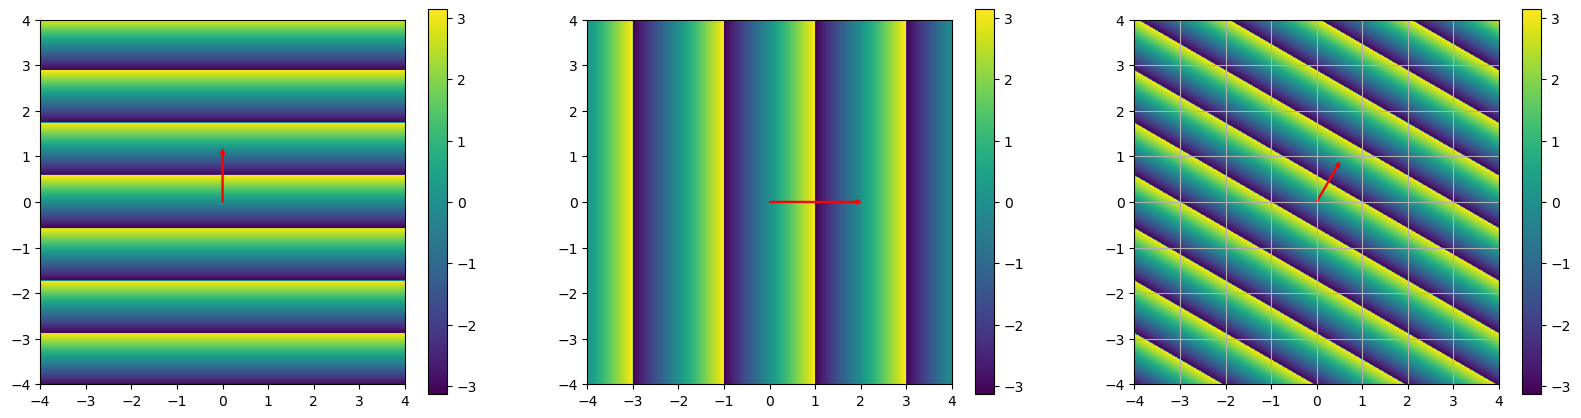

In [180]:
x, y = np.linspace(-4, 4, 501), np.linspace(-4, 4, 501)
X, Y = np.meshgrid(x, y)
lamda = 1
theta = -60*np.pi/180
alpha = np.cos(theta)
# beta = np.cos(np.abs(np.pi/2 - theta))
beta = np.sin(theta)


fig, axs = plt.subplots(1, 3, figsize=(20, 5))
# plt.figure(figsize=(7, 7))
wave_2d = np.exp((1j*2*np.pi/lamda)*(beta*Y))
cl1 = axs[0].imshow(np.angle(wave_2d), extent=[x.min(), x.max(), y.min(), y.max()])

wave_2d = np.exp((1j*2*np.pi/lamda)*(alpha*X))
cl2 = axs[1].imshow(np.angle(wave_2d), extent=[x.min(), x.max(), y.min(), y.max()])

wave_2d = np.exp((1j*2*np.pi/lamda)*(alpha*X + beta*Y))
cl3 = axs[2].imshow(np.angle(wave_2d), extent=[x.min(), x.max(), y.min(), y.max()])
# plt.plot(x[250:250 + int(501/9 *lamda)], (np.tan(theta))*x[250:250 + int(501/9 *lamda)], 'r-')

plt.colorbar(cl1, ax=axs[0])
plt.colorbar(cl1, ax=axs[1])
plt.colorbar(cl1, ax=axs[2])

axs[0].arrow(0, 0, 0, -1*lamda/beta, length_includes_head=True,
          head_width=0.1, head_length=0.1, color='red', width=0.02)
axs[1].arrow(0, 0, lamda/alpha, 0, length_includes_head=True,
          head_width=0.1, head_length=0.1, color='red', width=0.02)
axs[2].arrow(0, 0, lamda*alpha, -1*lamda*beta, length_includes_head=True,
          head_width=0.1, head_length=0.1, color='red', width=0.02)

plt.grid()
# plt.colorbar()

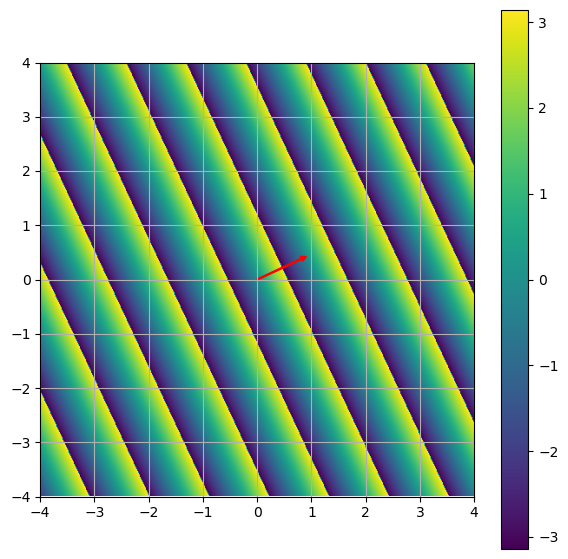

In [160]:
x, y = np.linspace(-4, 4, 501), np.linspace(-4, 4, 501)
X, Y = np.meshgrid(x, y)
lamda = 1
theta = -25*np.pi/180
alpha = np.cos(theta)
# beta = np.cos(np.abs(np.pi/2 - theta))
beta = np.sin(theta)
wave_2d = np.exp((1j*2*np.pi/lamda)*(alpha*X + beta*Y))


plt.figure(figsize=(7, 7))
plt.imshow(np.angle(wave_2d), extent=[x.min(), x.max(), y.min(), y.max()])
# plt.plot(x[250:250 + int(501/9 *lamda)], (np.tan(theta))*x[250:250 + int(501/9 *lamda)], 'r-')

plt.arrow(0, 0, lamda*alpha, -1*lamda*beta, length_includes_head=True,
          head_width=0.1, head_length=0.1, color='red', width=0.02)

plt.grid()
plt.colorbar()

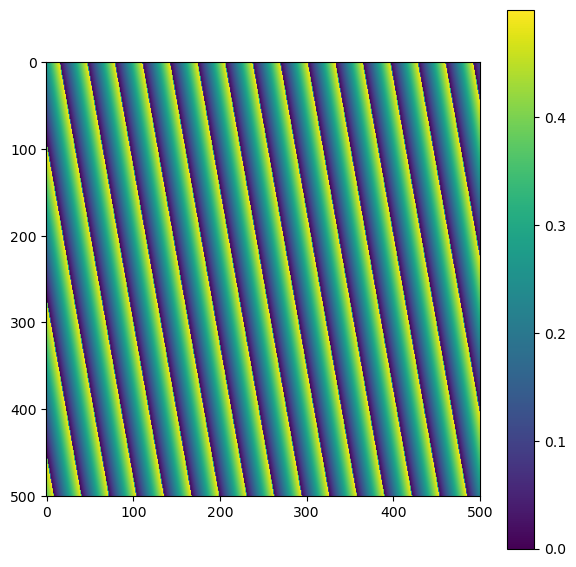

In [71]:
x, y = np.linspace(-4, 4, 501), np.linspace(-4, 4, 501)
X, Y = np.meshgrid(x, y)
theta = -10*np.pi/180
alpha = np.cos(theta)
beta = np.sin(theta)

X, Y = np.matmul(
    np.array([[alpha, beta], [-1*beta, alpha]]), np.array([X.reshape(-1), Y.reshape(-1)])
)

plt.figure(figsize=(7, 7))
plt.imshow(X.reshape(501, 501)%lamda)
plt.colorbar()

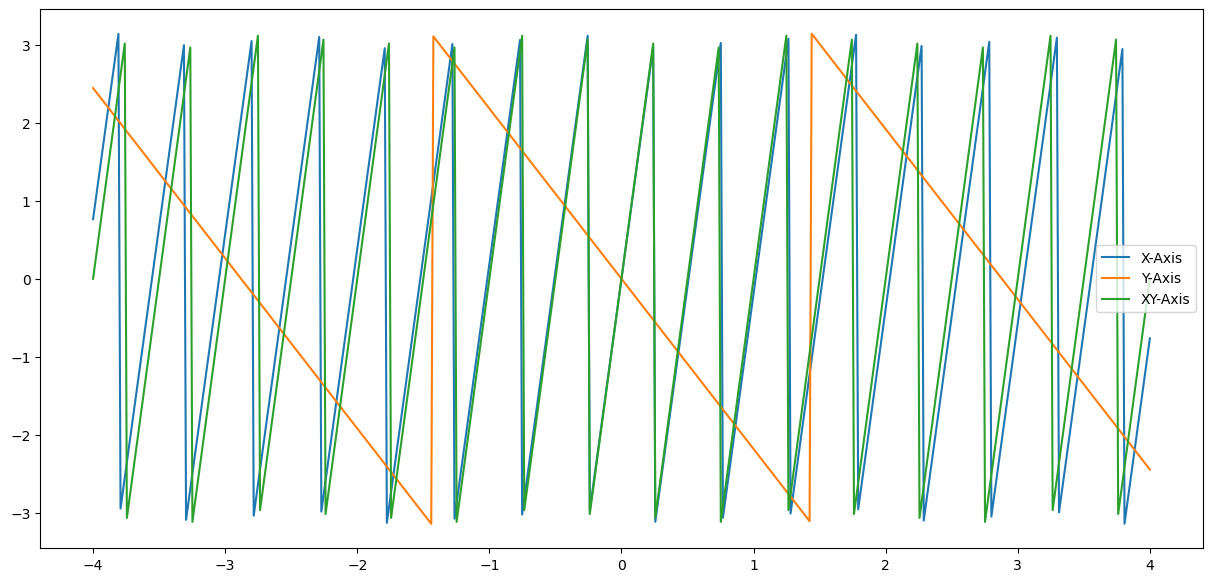

In [72]:
x_lamda = np.exp((1j*2*np.pi*x/(lamda/alpha)))
y_lamda = np.exp((1j*2*np.pi*y/(lamda/beta)))
xy_lamda = np.exp((1j*2*np.pi*y/(lamda)))

plt.figure(figsize=(15, 7))
plt.plot(x, np.angle(x_lamda), label='X-Axis')
plt.plot(x, np.angle(y_lamda), label='Y-Axis')
plt.plot(x, np.angle(xy_lamda), label='XY-Axis')

plt.legend()

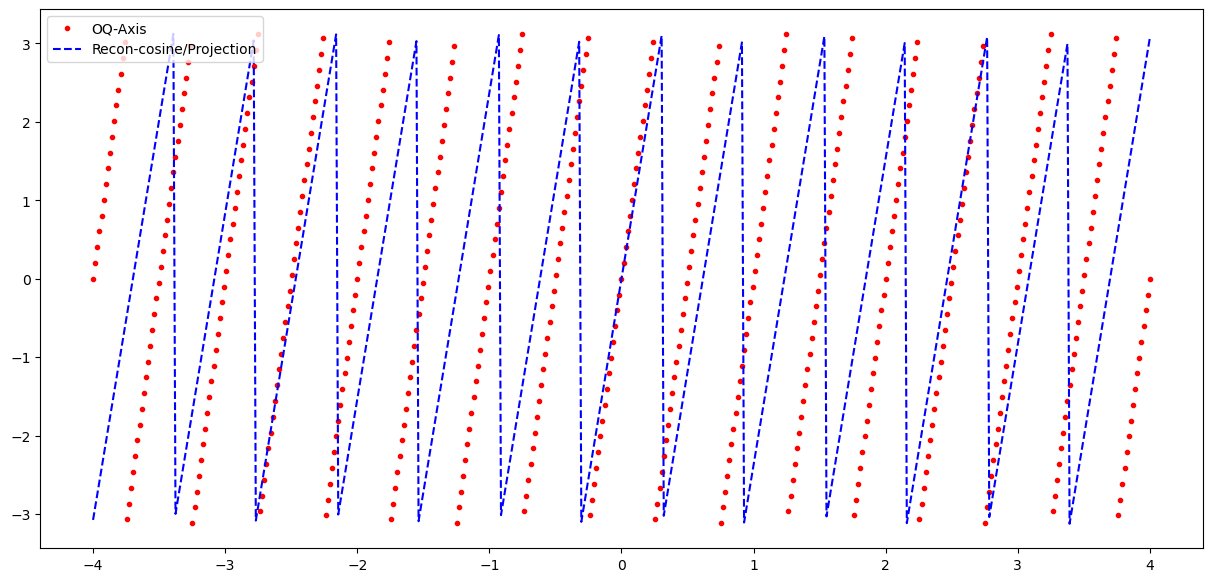

In [73]:
xy_lamda = np.exp(1j*2*np.pi*y/lamda)
recon_xy_lamda = np.exp(1j*2*np.pi*(alpha/lamda)*x) * np.exp(1j*2*np.pi*(beta/lamda)*y)
recon_proj_lamda = np.exp(1j*2*np.pi/(alpha*lamda)*x) * np.exp(1j*2*np.pi/(beta*lamda)*y) 

plt.figure(figsize=(15, 7))
plt.plot(x, np.angle(xy_lamda), 'r.', label='OQ-Axis')
plt.plot(x, np.angle(recon_xy_lamda), 'b--', label='Recon-cosine/Projection')
# plt.plot(x, np.angle(recon_proj_lamda), 'g--', label='Recon-Projection')

plt.legend()

In [74]:
beta, np.sqrt(1-alpha**2), alpha

(-0.17364817766693033, 0.1736481776669306, 0.984807753012208)

In [75]:
# x_lamda = np.exp((1j*2*np.pi*alpha*X/lamda))
# y_lamda = np.exp((1j*2*np.pi*beta*Y/lamda))

# plt.imshow(np.angle(x_lamda*y_lamda))
# plt.colorbar()

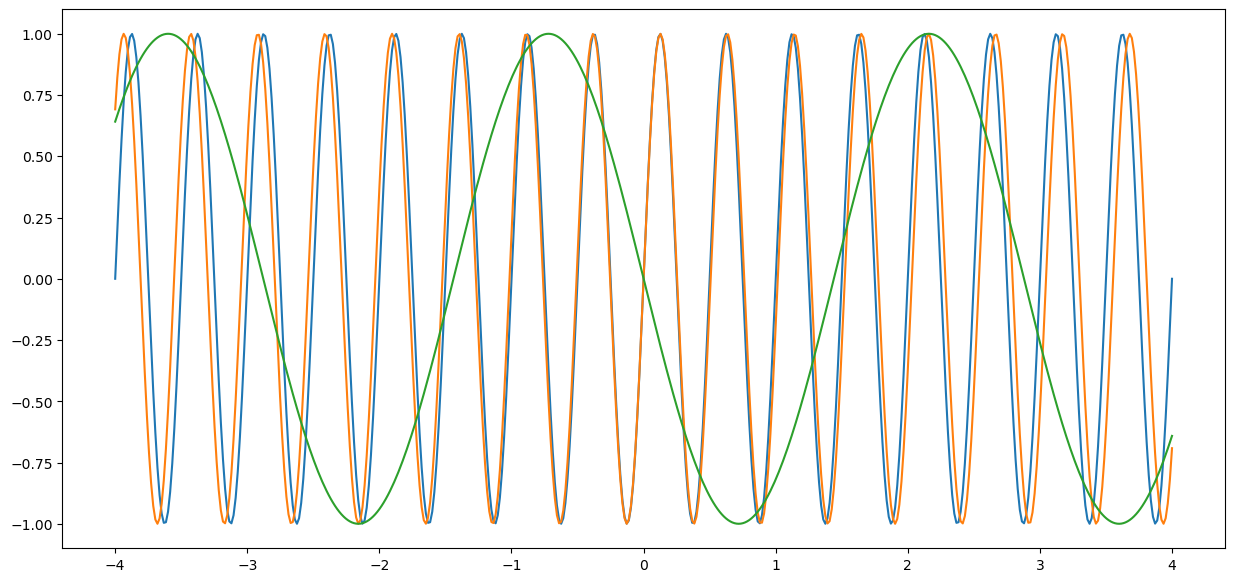

In [77]:
oq = np.sin(2*np.pi*x/lamda)
ox = np.sin(2*np.pi*x/(lamda/alpha))
oy = np.sin(2*np.pi*x/(lamda/beta))

plt.figure(figsize=(15, 7))
plt.plot(x, oq, label='OQ')
plt.plot(x, ox, label='OX')
plt.plot(x, oy, label='OY')